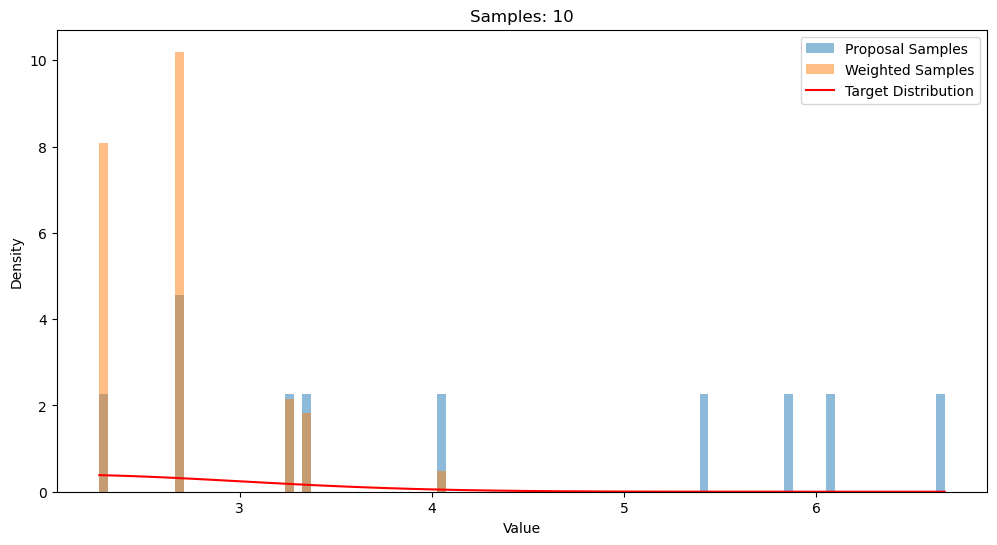

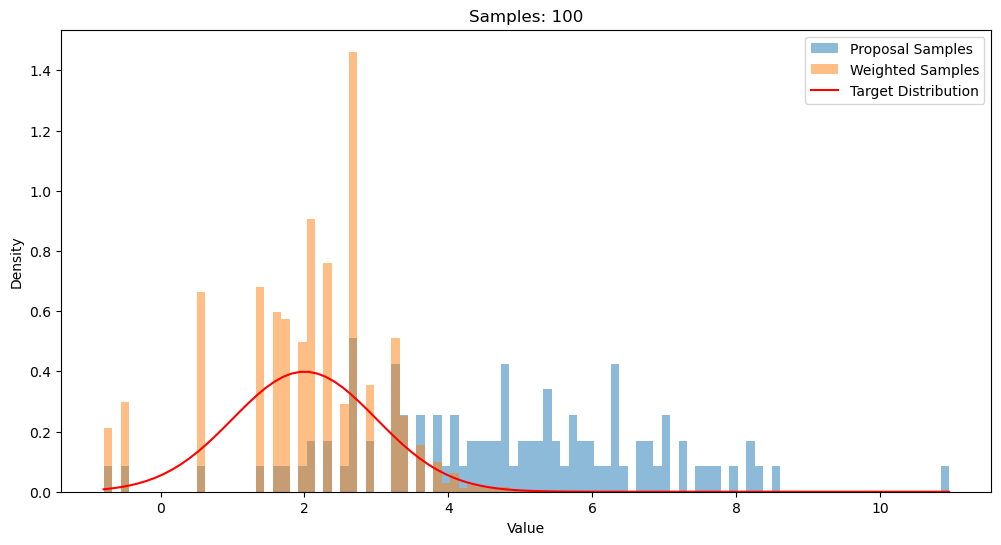

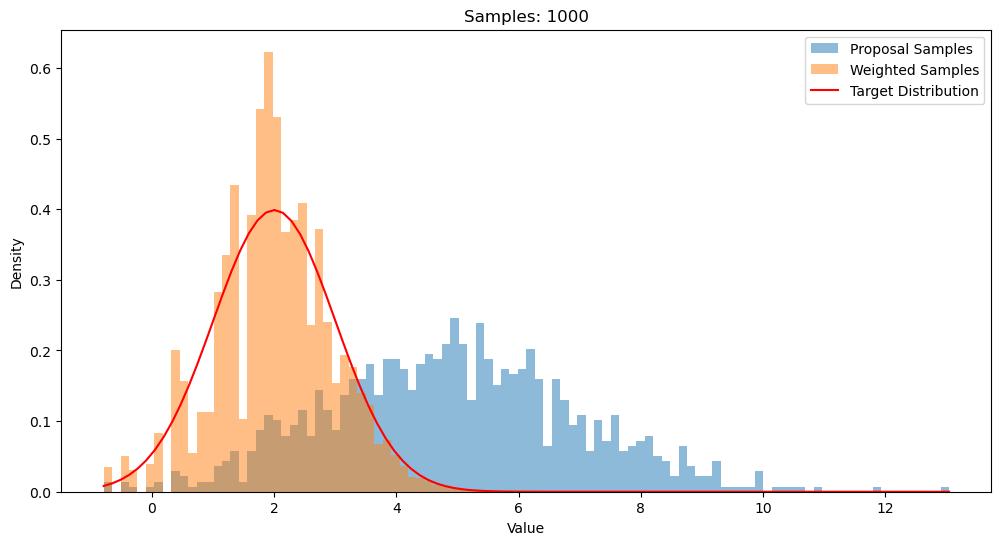

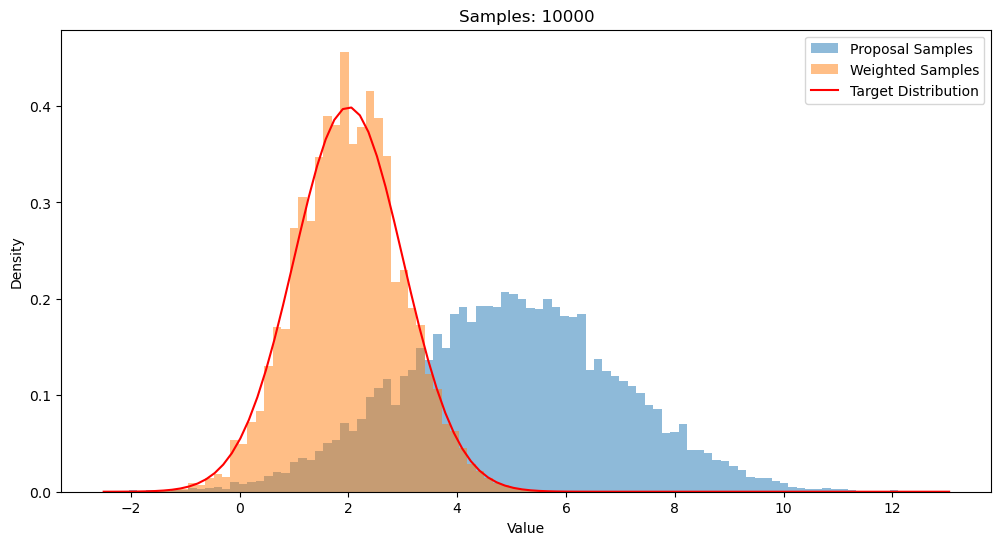

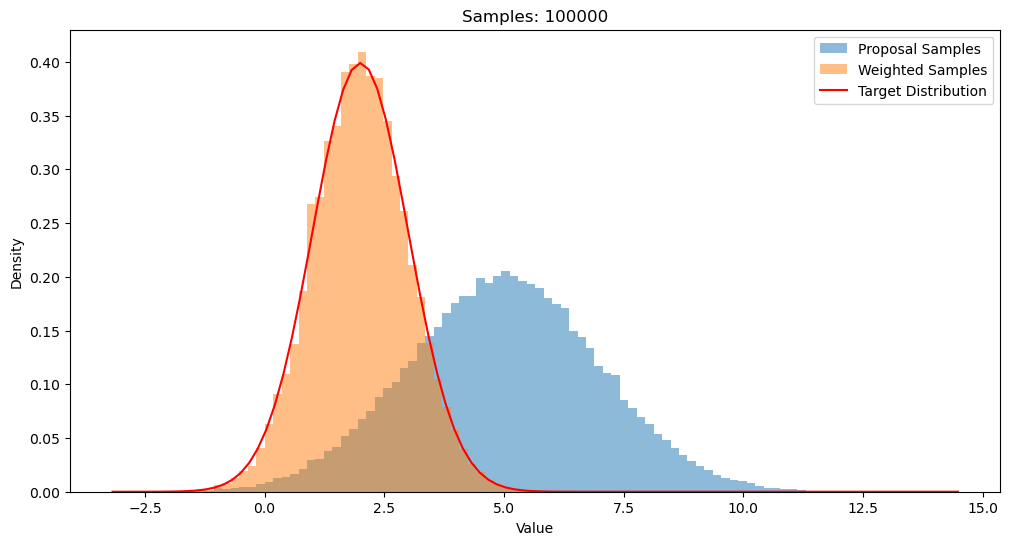

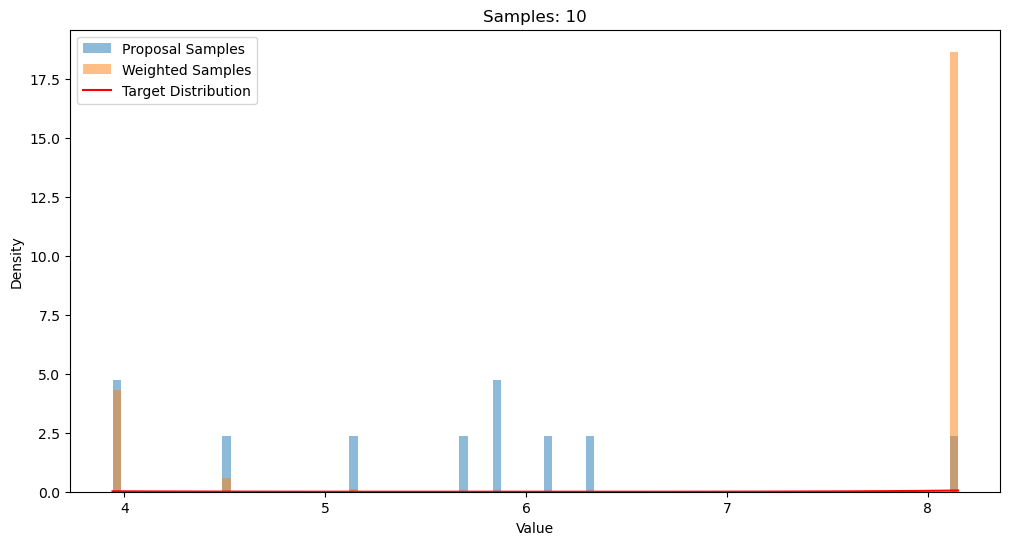

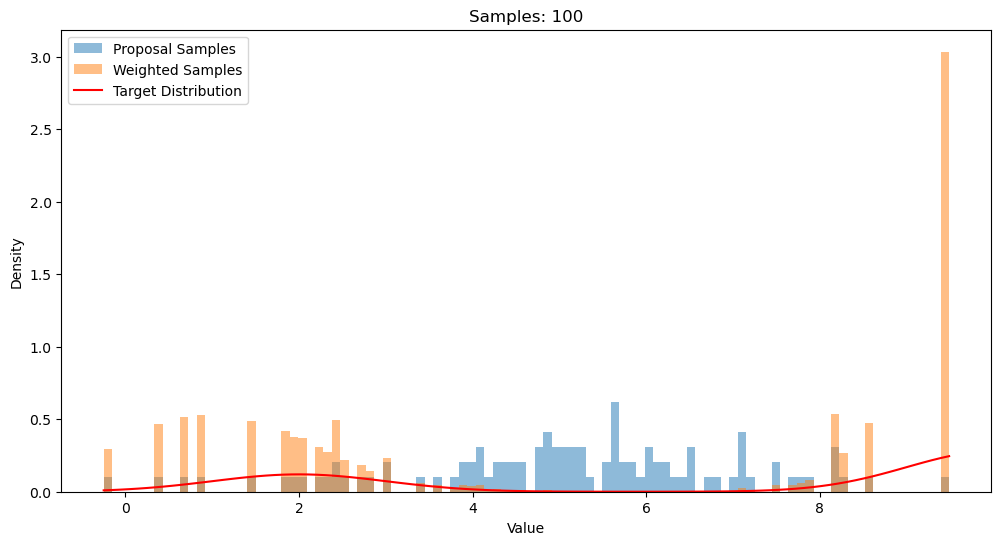

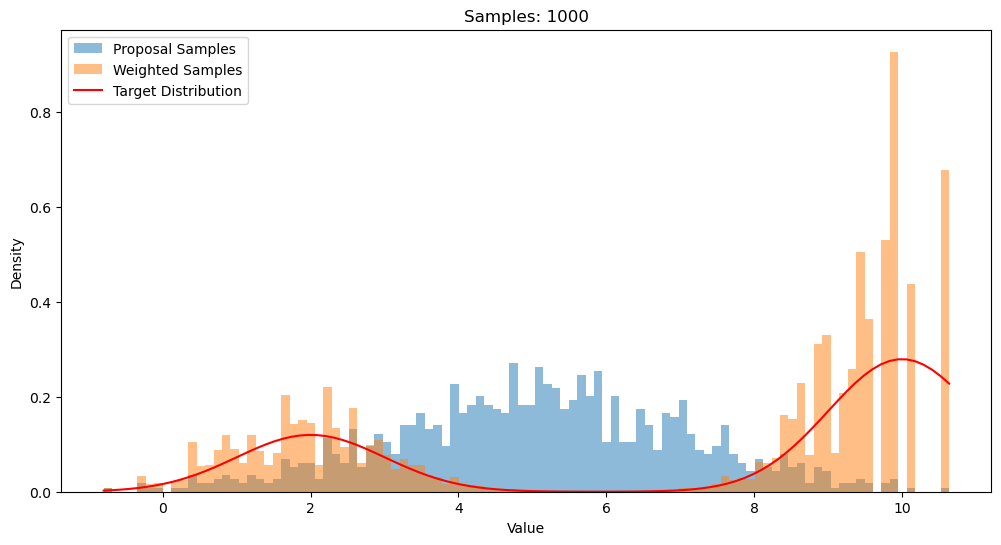

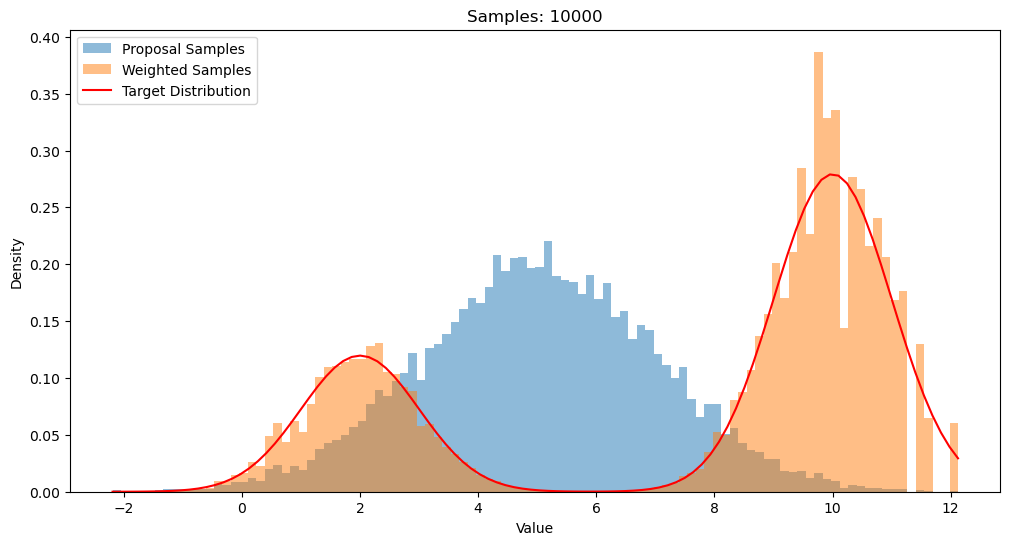

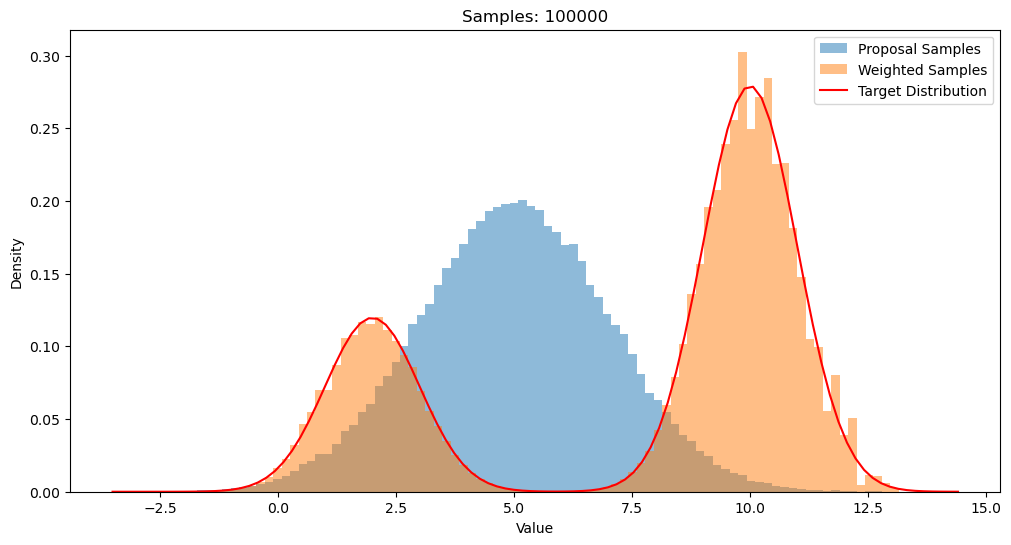

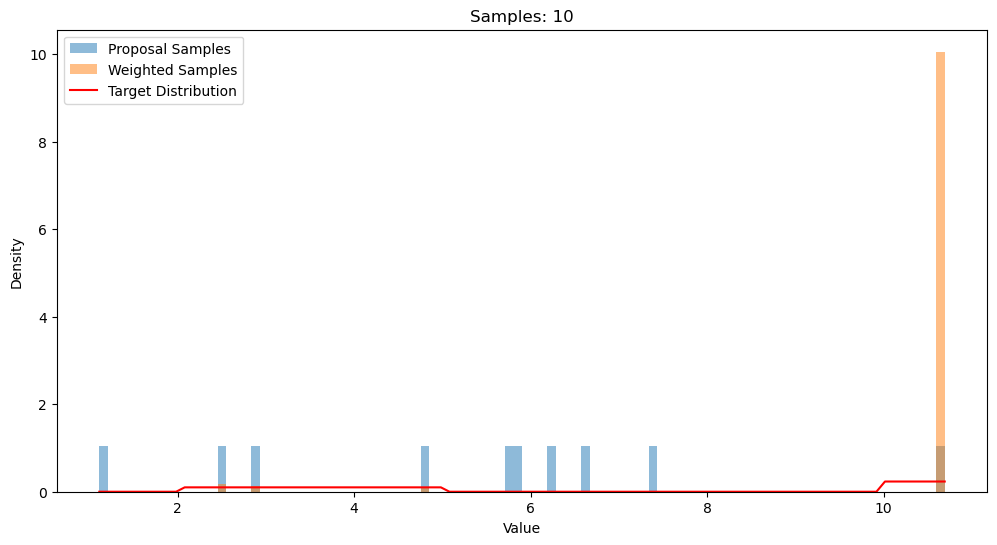

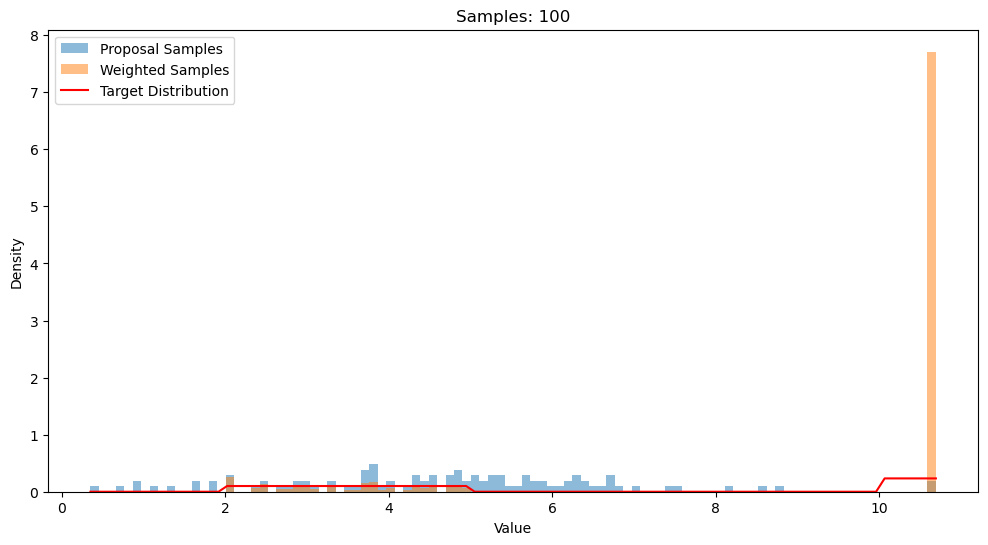

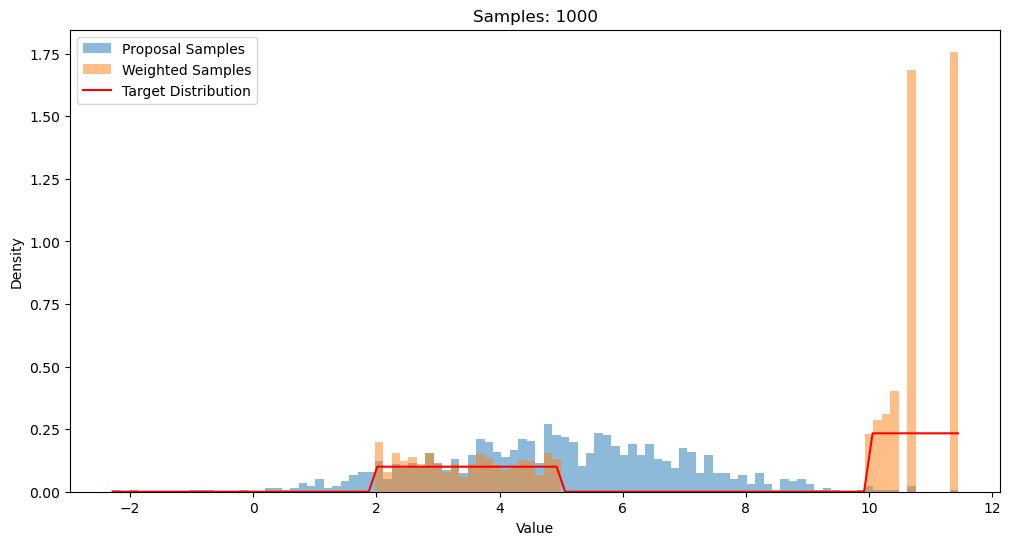

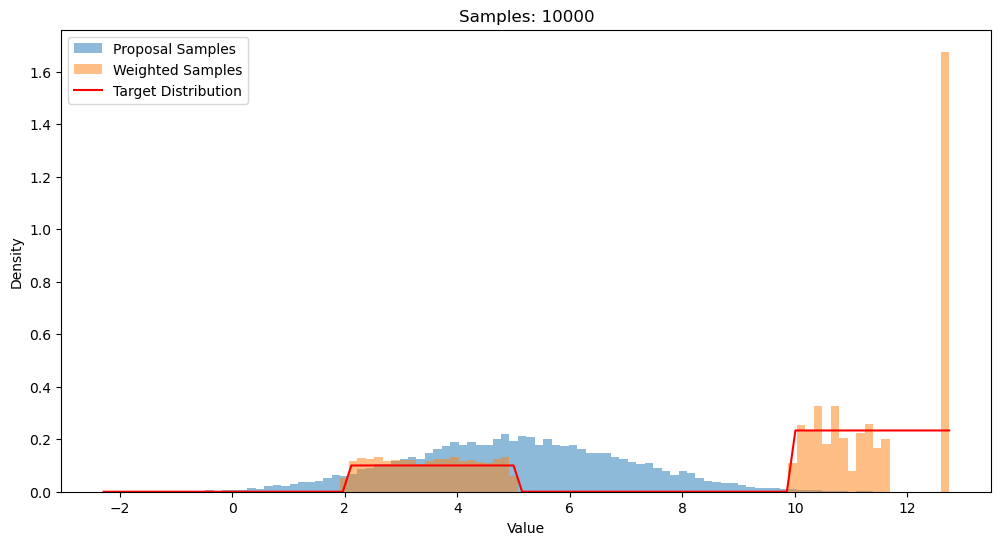

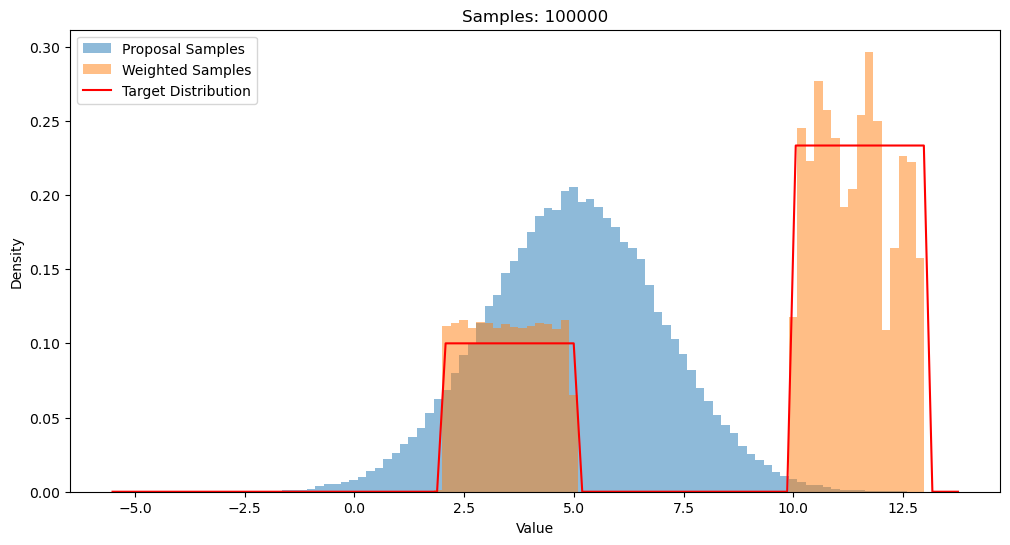

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target distributions
# TODO
def target_distribution_pdf1(x):
    return (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * (x - 2)**2)

def target_distribution_pdf2(x):
    f1 = (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * (x - 2)**2)
    f2 = (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * (x - 10)**2)
    return 0.3 * f1 + 0.7 * f2

def target_distribution_pdf3(x):
    fx = np.zeros_like(x, dtype=float)
    fx[(x >= 2) & (x <= 5)] = 0.1
    fx[(x >= 10) & (x <= 13)] = 0.23333
    return fx


# Define the proposal distribution
def proposal_distribution(x):
    return np.exp(-0.5 * ((x - 5) / 2) ** 2) / (2 * np.sqrt(2 * np.pi))

# Function to calculate importance weights
def calculate_importance_weights(samples, target_distribution_func):
    # TODO
    p_vals = target_distribution_func(samples)
    q_vals = proposal_distribution(samples)
    return p_vals / q_vals

# Function to plot the evolution of histograms and best-fit Gaussian
def plot_evolution_and_fit(num_samples, increments, target_distribution_func):
    total_samples = []
    weights = []

    for increment in increments:
        new_samples = np.random.normal(5, 2, increment)
        total_samples.extend(new_samples)
        new_weights = calculate_importance_weights(new_samples, target_distribution_func)
        weights.extend(new_weights)

        total_samples_array = np.array(total_samples)
        weights_array = np.array(weights)

        # Plot the weighted histogram to approximate the target distribution
        plt.figure(figsize=(12, 6))

        # Plot proposal samples histogram
        plt.hist(total_samples_array, bins=100, alpha=0.5, label='Proposal Samples', density=True)

        # Plot weighted samples histogram
        plt.hist(total_samples_array, bins=100, weights=weights_array, alpha=0.5, label='Weighted Samples', density=True)

        # Calculate and plot best-fit Gaussian for weighted samples
        x = np.linspace(np.min(total_samples_array), np.max(total_samples_array), 100)

        # Plot the true target distribution for comparison
        y = target_distribution_func(x)
        plt.plot(x, y, 'r-', label='Target Distribution')

        plt.title(f"Samples: {len(total_samples)}")
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

# Parameters
num_samples = 100000
increments = [10, 90, 900, 9000, 90000]  # Sample sizes to show evolution

# Plot the evolution of histograms for all three target functions
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf1)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf2)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf3)


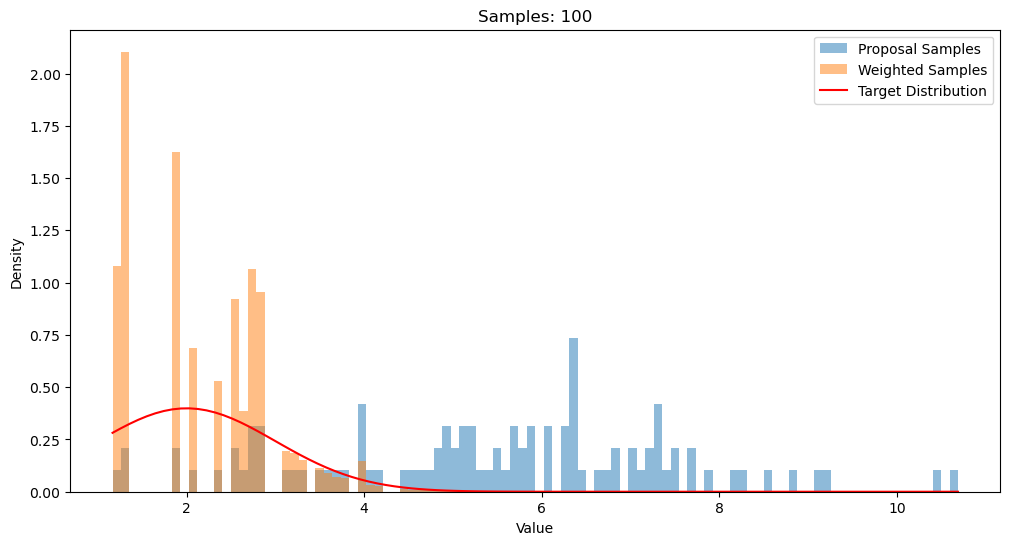

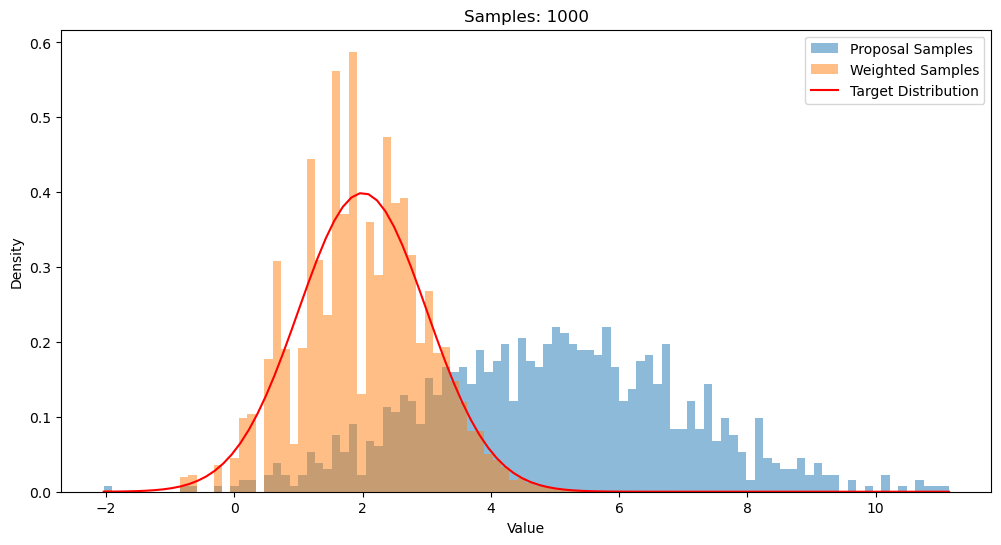

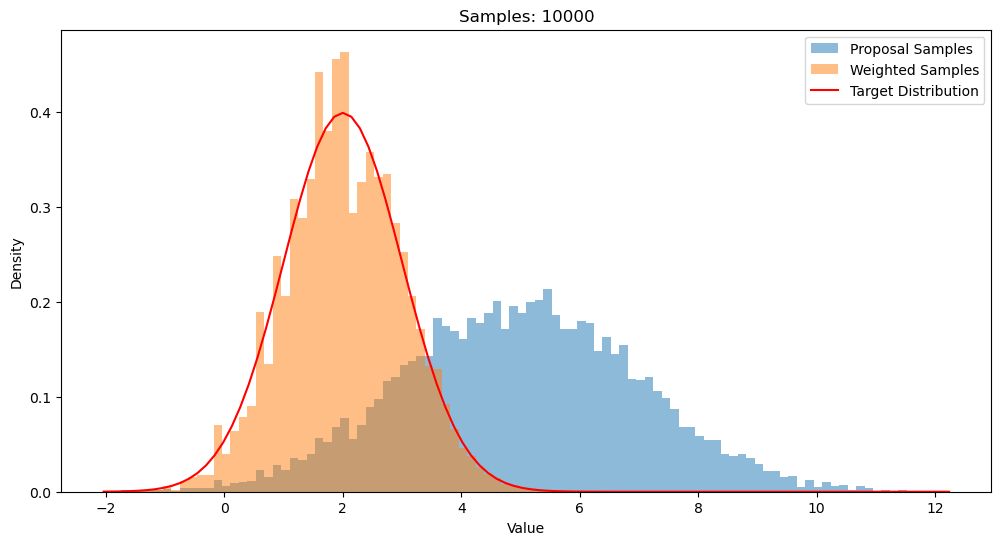

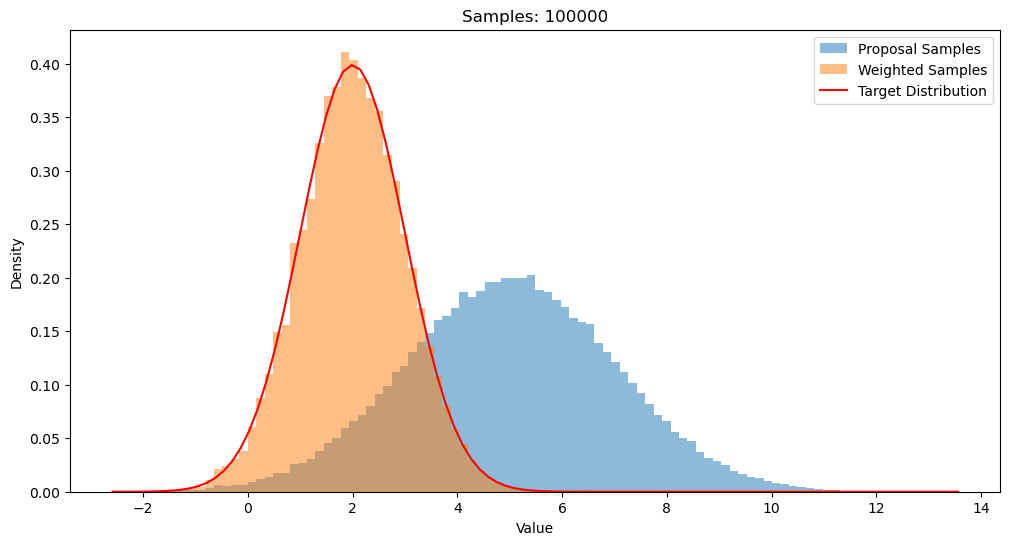

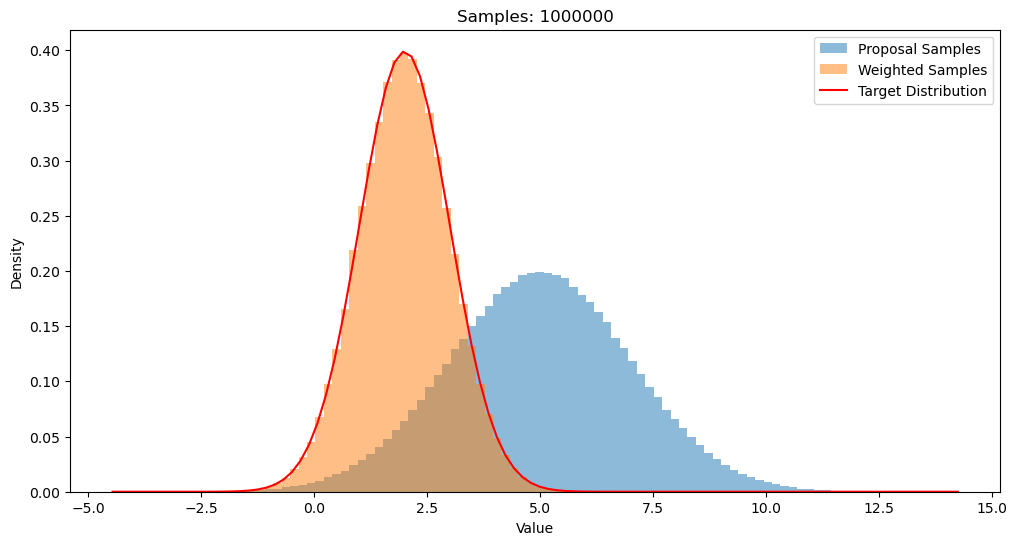

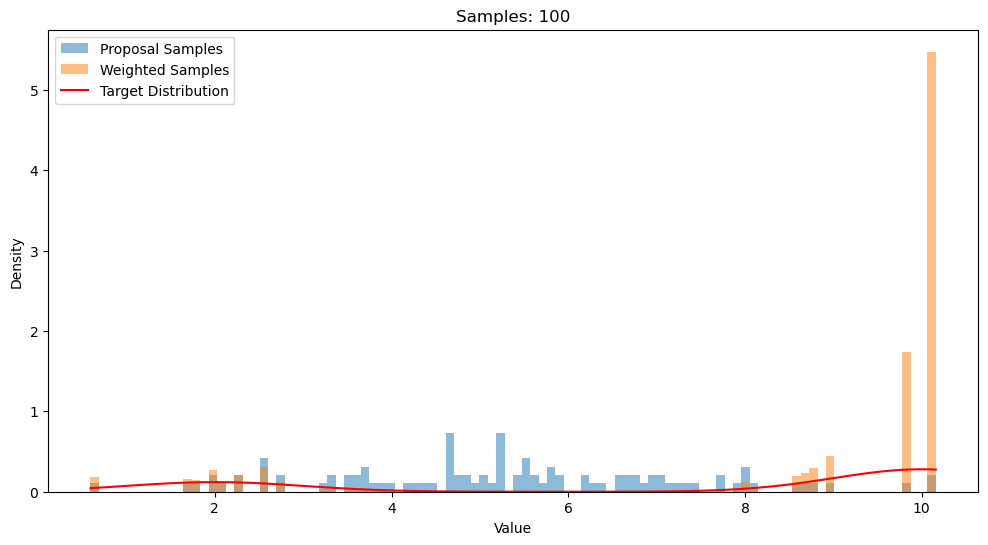

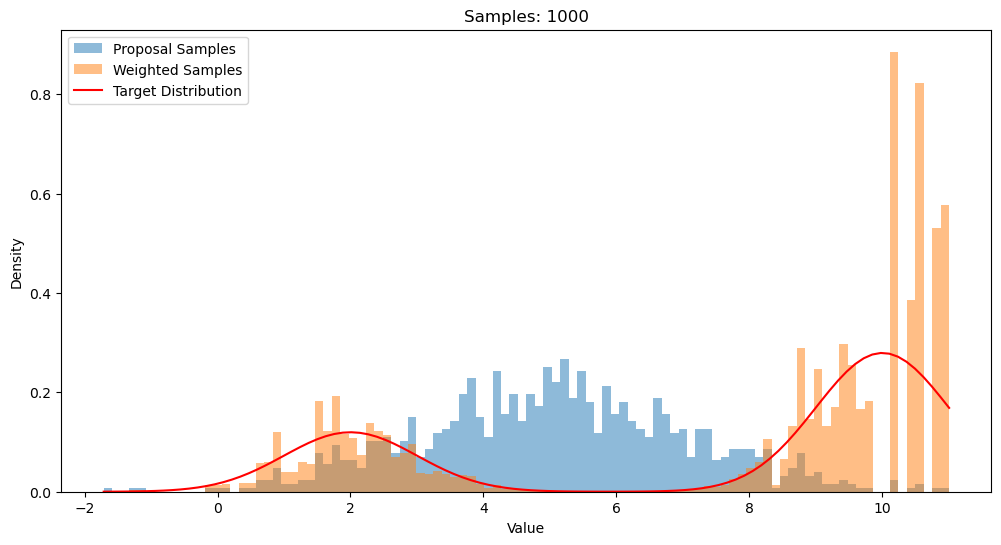

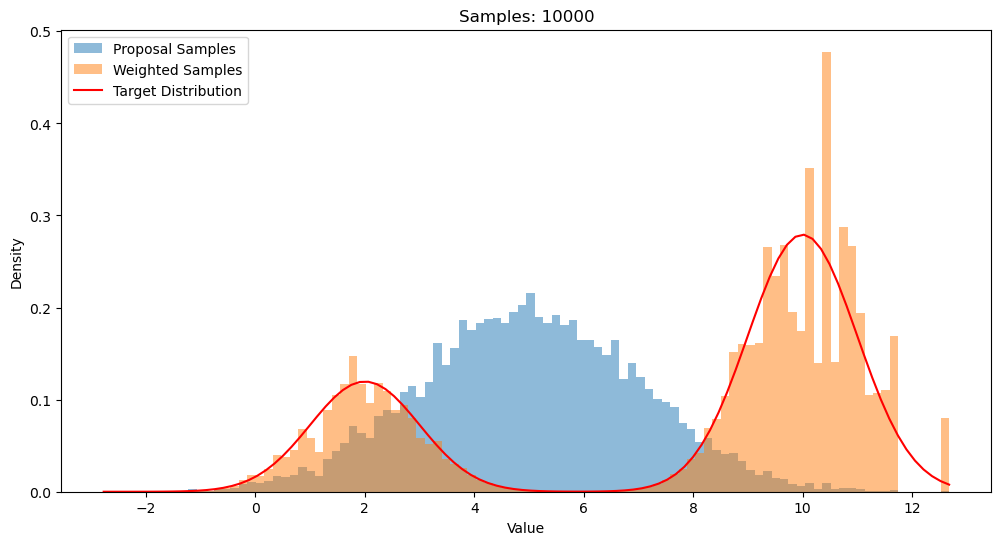

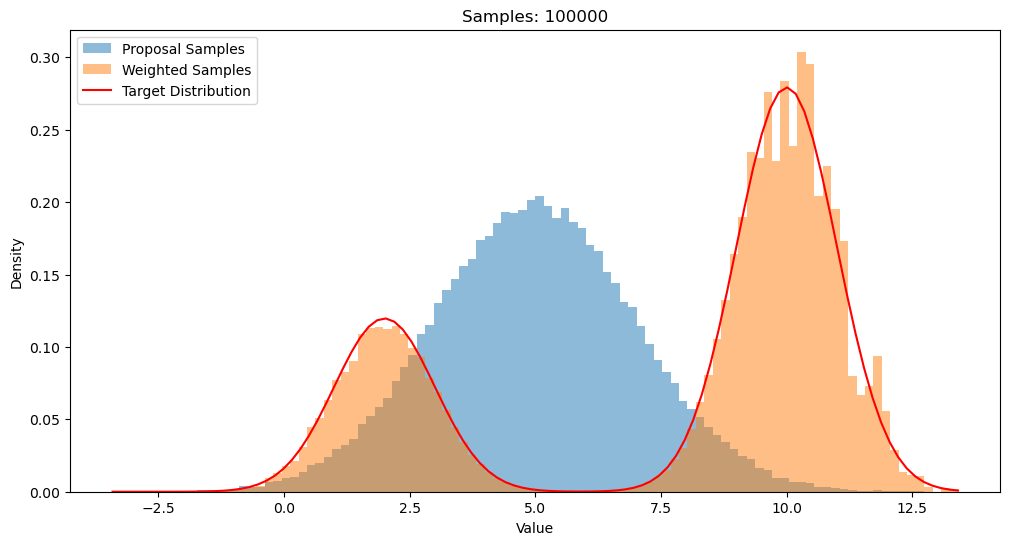

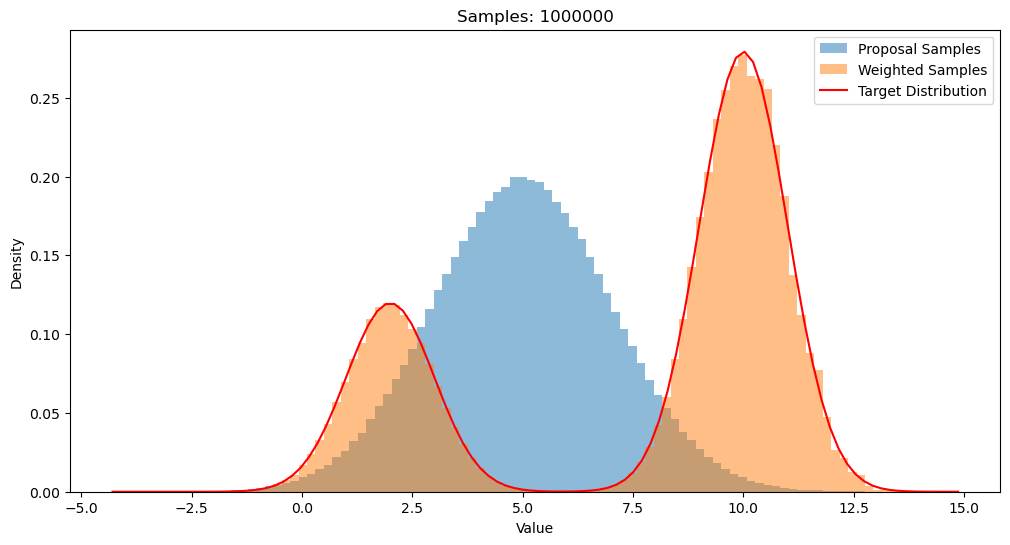

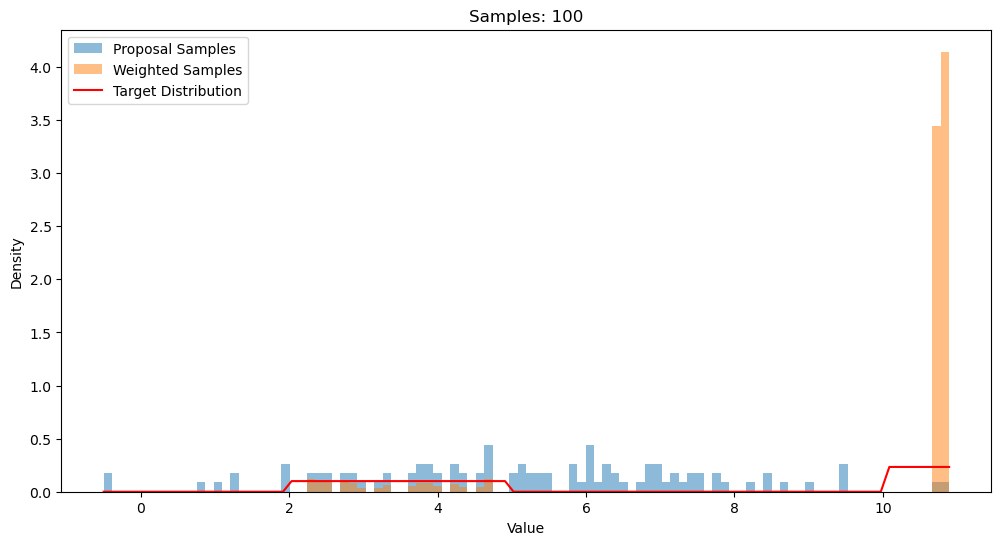

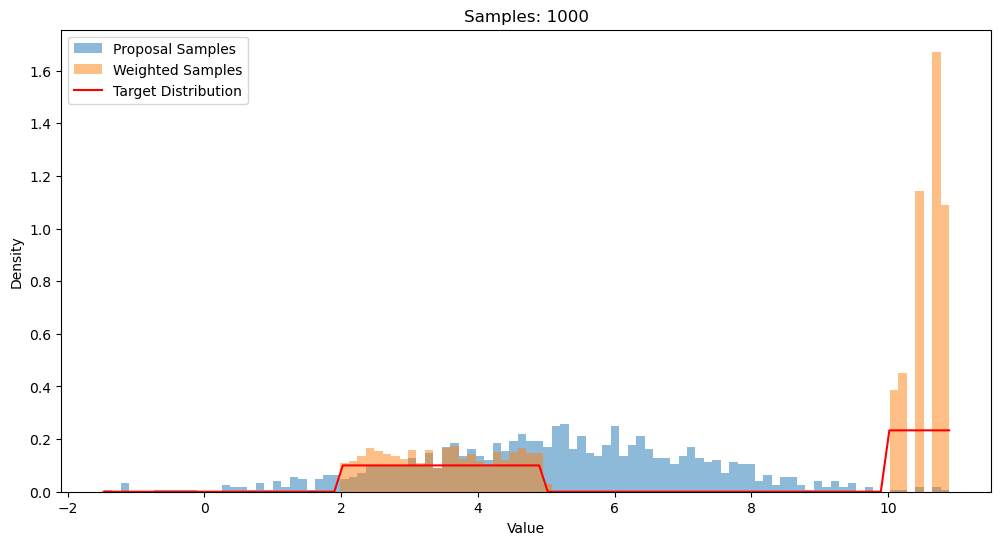

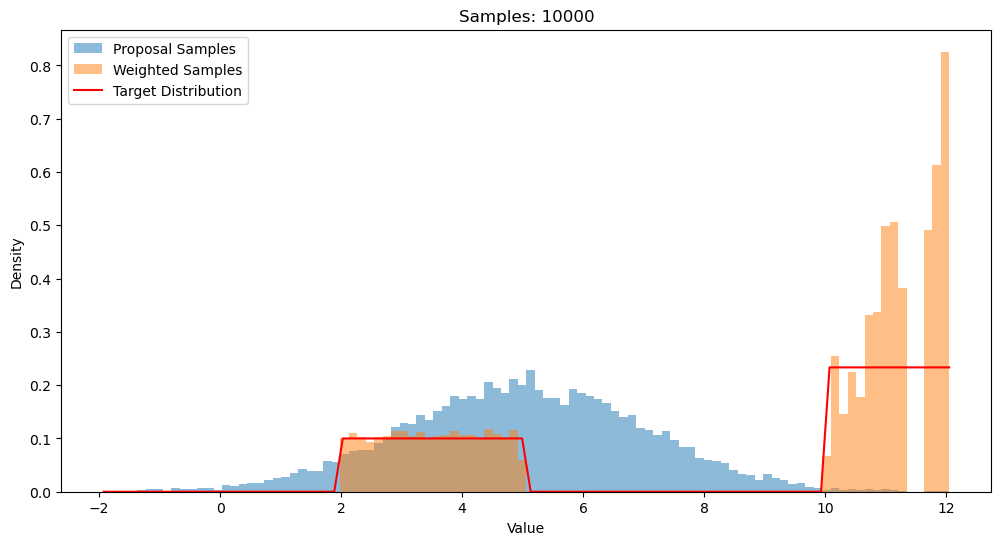

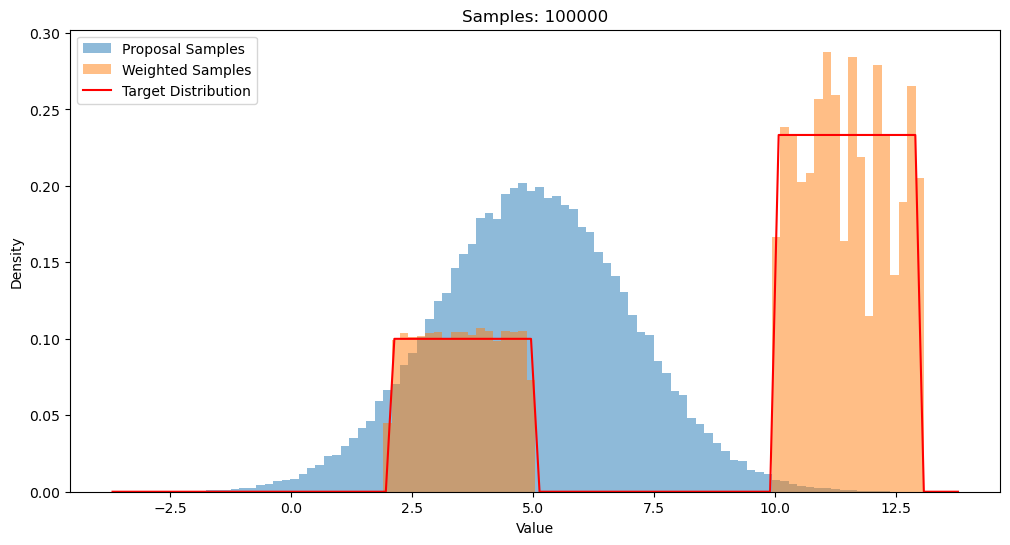

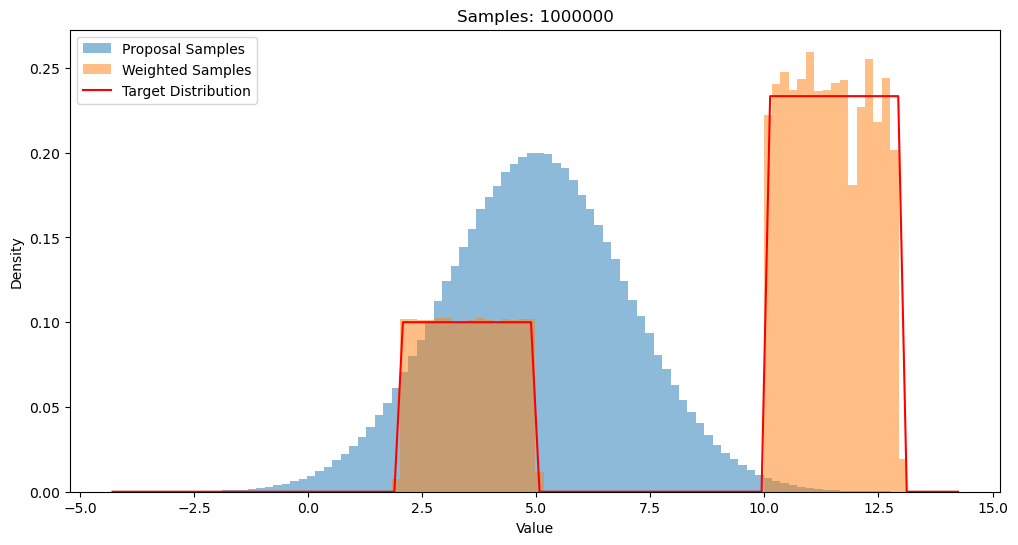

In [6]:
# TODO run importance sampling with 1000000     
# Parameters
num_samples = 100000
increments = [100, 900, 9000, 90000, 900000]  # Sample sizes to show evolution

# Plot the evolution of histograms for all three target functions
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf1)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf2)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf3)

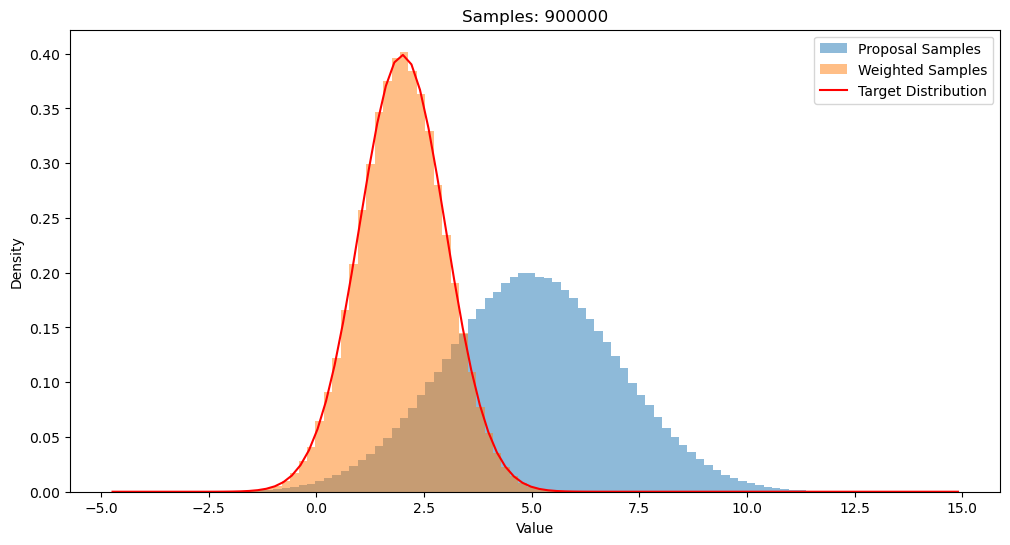

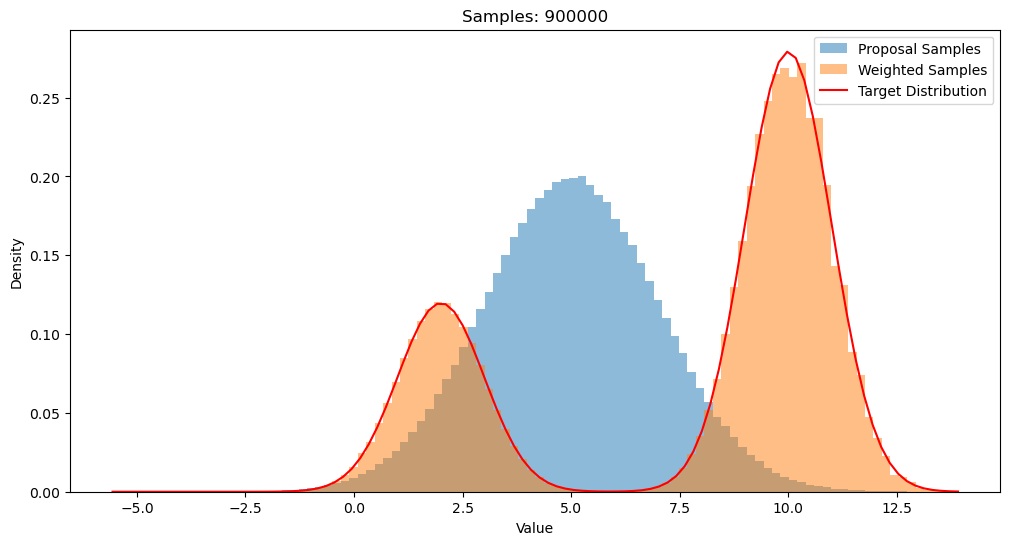

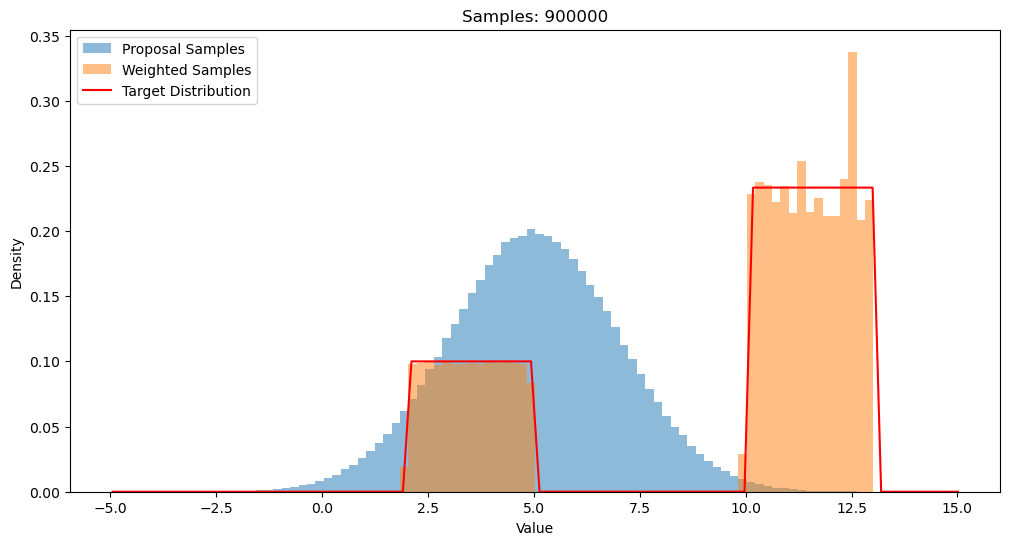

In [7]:
# Importance sampling with 1000000 samples
num_samples = 1000000
increments = [900000]  # Sample sizes to show evolution
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf1)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf2)
plot_evolution_and_fit(num_samples, increments, target_distribution_pdf3)


    